In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tickers = ['MSFT', 'AMZN', 'FB', 'NVDA', 'AAPL']

In [6]:
def get_stock_returns(tickers, interval, time_period):
    '''
    Valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
    '''
    stock_returns = list()
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        print('Retrieve stock price for: ', ticker)
        stock_returns.append(stock.history(interval=interval, period=time_period).Close.dropna().pct_change().fillna(0))
    return np.array(stock_returns)

def data_process(returns, normalizing_factor=252):
    '''
    Normalizing factor by default adjusts to the annualized data
    '''
    covariance_matrix = np.cov(returns) * normalizing_factor
    expected_returns = np.mean(returns, axis=1) * normalizing_factor
    return covariance_matrix, expected_returns

In [7]:
stock_returns = get_stock_returns(tickers, interval='1d', time_period='5y')
Q, expected_returns = data_process(stock_returns, normalizing_factor=1)

Retrieve stock price for:  MSFT
Retrieve stock price for:  AMZN
Retrieve stock price for:  FB
Retrieve stock price for:  NVDA
Retrieve stock price for:  AAPL


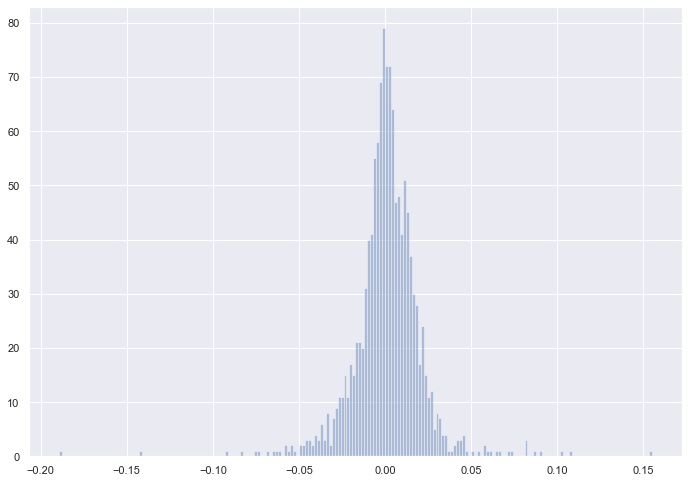

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(stock_returns[2], bins=200, kde=False)

In [10]:
def objective(w):
    return -1 * (np.dot(expected_returns, w) / np.dot(np.dot(w, Q), w))

In [11]:
def constraint_1(w):
    return w.sum() - 1.0

In [12]:
w0 = np.random.uniform(high=1 / len(tickers), size=len(tickers))
bounds = ([(0.01, 0.5)] * len(tickers))
cons = [{'type': 'eq', 'fun': constraint_1}]

## Solve The Equation 

In [13]:
sol = minimize(objective, w0, method='SLSQP', bounds=bounds, constraints=cons)
sol

     fun: -5.990497432502714
     jac: array([5.98686534, 5.98665416, 6.35466075, 5.98748577, 5.98657578])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.28788247, 0.35106358, 0.01      , 0.14276071, 0.20829324])

In [16]:
sol.fun

float